In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from __compute_polarization__ import get_polarization_with_inverse
from __load_graph_data__ import load_graph

ds = 'ClintonTrump'

g = load_graph(f'../datasets/{ds}.gml')
pol_arxiki, gnwmes = get_polarization_with_inverse(g)

title = f'{ds} all heuristics'

y_label = 'p(z)'
x_label = 'Number of edges added'

if ds=='karate' or ds=='books':
    list_of_labels = ['Greedy', 'GBatch', 'FTGreedy', 'FTGreedyBatch', 'Expressed Distance',
                     'pGreedy', 'pGBatch', 'pFTGreedy', 'pFTGreedyBatch', 'pExpressed Distance', 'maxProb','Random']
else:
    list_of_labels = ['FTGreedy', 'FTGreedyBatch', 'Expressed Distance',
                     'pFTGreedy', 'pFTGreedyBatch', 'pExpressed Distance', 'maxProb', 'Random']


with open(f"../pickles/{ds}/normal/{ds}_info", 'rb') as fp:
    info = pickle.load(fp)

with open(f"../pickles/{ds}/random/{ds}_info", 'rb') as fp:
    random_info = pickle.load(fp)
    
with open(f"../pickles/{ds}/probs/{ds}_info", 'rb') as fp:
    info_prob = pickle.load(fp)

with open(f"../pickles/{ds}/reduction/{ds}_info", 'rb') as fp:
    reduction_info = pickle.load(fp)

In [2]:
print(random_info)

{'Random_karate_5': {'result_dictionary': [(9, 12), (26, 31), (14, 25), (0, 15), (6, 11)], 'time': 0.09667110443115234, 'polarization': 0.27423519730025336}, 'Random_karate_10': {'result_dictionary': [(9, 12), (26, 31), (14, 25), (0, 15), (6, 11), (23, 26), (5, 24), (11, 22), (17, 24), (7, 25)], 'time': 0.09667110443115234, 'polarization': 0.21721567980279274}, 'Random_karate_15': {'result_dictionary': [(9, 12), (26, 31), (14, 25), (0, 15), (6, 11), (23, 26), (5, 24), (11, 22), (17, 24), (7, 25), (17, 22), (29, 30), (12, 15), (9, 30), (10, 17)], 'time': 0.09667110443115234, 'polarization': 0.18202755784244046}, 'Random_karate_20': {'result_dictionary': [(9, 12), (26, 31), (14, 25), (0, 15), (6, 11), (23, 26), (5, 24), (11, 22), (17, 24), (7, 25), (17, 22), (29, 30), (12, 15), (9, 30), (10, 17), (12, 16), (4, 33), (25, 27), (1, 29), (9, 32)], 'time': 0.09667110443115234, 'polarization': 0.1470104338848083}, 'Random_books_5': {'result_dictionary': [(43, 47), (48, 95), (60, 76), (19, 98),

In [3]:
alphaVal = 0.8
linethick = 3.5


def get_dash_markers_colors(i):
    if i == 'Greedy':
        return [3, 1], 8, 'green'
    elif i == 'GBatch':
        return [1000, 1], "^", '#ff6961'
    elif i == 'FTGreedy':
        return [2, 1, 10, 1], 9, 'blue'
    elif i == 'FTGreedyBatch':
        return [4, 1, 1, 1, 1, 1], 8, 'black'
    elif i == 'Expressed Distance' or i == 'BExpressed Distance':
        return [3, 1], 10, 'red'
    elif i == 'Random different':
        return [1000, 1], 'None', 'orange'
    elif i == 'Random':
        return [1000, 1], 'None', 'pink'
    elif i == 'pGreedy':
        return [3, 1], 8, '#fa675d'
    elif i == 'pGBatch':
        return [1000, 1], "^", '#db97ca'
    elif i == 'pFTGreedy':
        return [2, 1, 10, 1], 9, '#f6c857'
    elif i == 'pFTGreedyBatch':
        return [4, 1, 1, 1, 1, 1], 8, '#f2e880'
    elif i == 'pExpressed Distance' or i == 'BExpressed Distance':
        return [3, 1], 10, '#7dd0f0'
    elif i == 'maxProb':
        return [3, 1], 10, '#ef445e'

In [4]:
if ds=='karate' or ds=='books':
    
    Greedy_5 = info[f'Greedy_{ds}_5']['polarization']
    Greedy_10 = info[f'Greedy_{ds}_10']['polarization']
    Greedy_15 = info[f'Greedy_{ds}_15']['polarization']
    Greedy_20 = info[f'Greedy_{ds}_20']['polarization']

    greedy_edges = [Greedy_5, Greedy_10, Greedy_15, Greedy_20]

    GBatch_5 = info[f'GBatch_{ds}_5']['polarization']
    GBatch_10 = info[f'GBatch_{ds}_10']['polarization']
    GBatch_15 = info[f'GBatch_{ds}_15']['polarization']
    GBatch_20 = info[f'GBatch_{ds}_20']['polarization']

    gbatch_edges = [GBatch_5, GBatch_10, GBatch_15, GBatch_20]

FTGreedy_5 = info[f'FTGreedy_{ds}_5']['polarization']
FTGreedy_10 = info[f'FTGreedy_{ds}_10']['polarization']
FTGreedy_15 = info[f'FTGreedy_{ds}_15']['polarization']
FTGreedy_20 = info[f'FTGreedy_{ds}_20']['polarization']

FTGreedy_edges = [FTGreedy_5, FTGreedy_10, FTGreedy_15, FTGreedy_20]

FTGreedyBatch_5 = info[f'FTGreedyBatch_{ds}_5']['polarization']
FTGreedyBatch_10 = info[f'FTGreedyBatch_{ds}_10']['polarization']
FTGreedyBatch_15 = info[f'FTGreedyBatch_{ds}_15']['polarization']
FTGreedyBatch_20 = info[f'FTGreedyBatch_{ds}_20']['polarization']

FTGreedyBatch_edges = [FTGreedyBatch_5, FTGreedyBatch_10, FTGreedyBatch_15, FTGreedyBatch_20]

expressed_5 = info[f'Expressed Distance_{ds}_5']['polarization']
expressed_10 = info[f'Expressed Distance_{ds}_10']['polarization']
expressed_15 = info[f'Expressed Distance_{ds}_15']['polarization']
expressed_20 = info[f'Expressed Distance_{ds}_20']['polarization']

expressed_edges = [expressed_5, expressed_10, expressed_15, expressed_20]

reduction_5 = reduction_info[f'pReduction_{ds}_5']['polarization']
reduction_10 = reduction_info[f'pReduction_{ds}_10']['polarization']
reduction_15 = reduction_info[f'pReduction_{ds}_15']['polarization']
reduction_20 = reduction_info[f'pReduction_{ds}_20']['polarization']

pReduction_edges = [reduction_5, reduction_10, reduction_15, reduction_20]

random_5 = random_info[f'Random_{ds}_5']['polarization']
random_10 = random_info[f'Random_{ds}_10']['polarization']
random_15 = random_info[f'Random_{ds}_15']['polarization']
random_20 = random_info[f'Random_{ds}_20']['polarization']

random_edges = [random_5, random_10, random_15, random_20]

In [5]:
if ds=='karate' or ds=='books':
    
    Greedy_5 = info_prob[f'Greedy_{ds}_5']['polarization']
    Greedy_10 = info_prob[f'Greedy_{ds}_10']['polarization']
    Greedy_15 = info_prob[f'Greedy_{ds}_15']['polarization']
    Greedy_20 = info_prob[f'Greedy_{ds}_20']['polarization']

    greedy_edges_probs = [Greedy_5, Greedy_10, Greedy_15, Greedy_20]

    GBatch_5 = info_prob[f'GBatch_{ds}_5']['polarization']
    GBatch_10 = info_prob[f'GBatch_{ds}_10']['polarization']
    GBatch_15 = info_prob[f'GBatch_{ds}_15']['polarization']
    GBatch_20 = info_prob[f'GBatch_{ds}_20']['polarization']

    gbatch_edges_probs = [GBatch_5, GBatch_10, GBatch_15, GBatch_20]

FTGreedy_5 = info_prob[f'FTGreedy_{ds}_5']['polarization']
FTGreedy_10 = info_prob[f'FTGreedy_{ds}_10']['polarization']
FTGreedy_15 = info_prob[f'FTGreedy_{ds}_15']['polarization']
FTGreedy_20 = info_prob[f'FTGreedy_{ds}_20']['polarization']

FTGreedy_edges_probs = [FTGreedy_5, FTGreedy_10, FTGreedy_15, FTGreedy_20]

FTGreedyBatch_5 = info_prob[f'FTGreedyBatch_{ds}_5']['polarization']
FTGreedyBatch_10 = info_prob[f'FTGreedyBatch_{ds}_10']['polarization']
FTGreedyBatch_15 = info_prob[f'FTGreedyBatch_{ds}_15']['polarization']
FTGreedyBatch_20 = info_prob[f'FTGreedyBatch_{ds}_20']['polarization']

FTGreedyBatch_edges_probs = [FTGreedyBatch_5, FTGreedyBatch_10, FTGreedyBatch_15, FTGreedyBatch_20]

expressed_5 = info_prob[f'Expressed Distance_{ds}_5']['polarization']
expressed_10 = info_prob[f'Expressed Distance_{ds}_10']['polarization']
expressed_15 = info_prob[f'Expressed Distance_{ds}_15']['polarization']
expressed_20 = info_prob[f'Expressed Distance_{ds}_20']['polarization']

expressed_edges_probs = [expressed_5, expressed_10, expressed_15, expressed_20]

In [6]:
list_of_all = []

if ds=='karate' or ds=='books':
    list_of_axes = [greedy_edges, gbatch_edges, FTGreedy_edges, FTGreedyBatch_edges, expressed_edges, greedy_edges_probs, gbatch_edges_probs, FTGreedy_edges_probs, FTGreedyBatch_edges_probs, expressed_edges_probs, pReduction_edges, random_edges]
else:
    list_of_axes = [FTGreedy_edges, FTGreedyBatch_edges, expressed_edges,FTGreedy_edges_probs, FTGreedyBatch_edges_probs, expressed_edges_probs, pReduction_edges, random_edges]

#add the original polarization everywhere
for list_of_edges in list_of_axes:
    list_of_edges.insert(0, pol_arxiki)

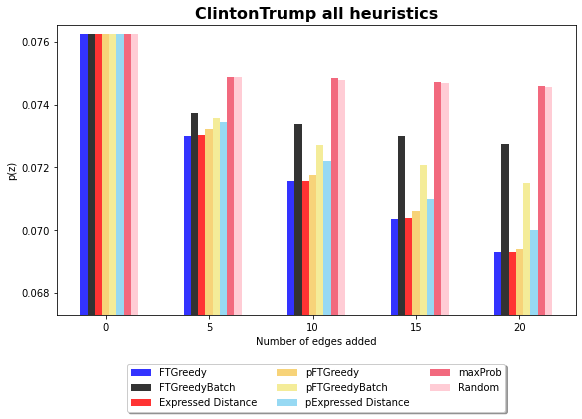

In [8]:
fig, ax1 = plt.subplots()

x_axis = [0, 5,10,15,20]
ind = np.arange(len(x_axis))
#0.10 for not greedies
width = 0.07

xticklabels = x_axis

flat_list = [item for sublist in list_of_axes for item in sublist]
minimum_value = min(flat_list)
maximum_value = max(flat_list)

all_groups = list_of_axes

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate(all_groups):
    # compute position for each bar
    bar_position = width * i
    dash, marker, color = get_dash_markers_colors(list_of_labels[i])
    ax1.bar(ind + bar_position, bar_values, width, alpha=alphaVal, color=color)

set_min = minimum_value-0.002
#set_max = maximum_value + 0.01
set_max = maximum_value + 0.0003

#width*6 for karate, books, *4 for else

ax1.set(ylim=[set_min, set_max])
plt.title(title, fontsize=16, fontweight='bold')
plt.setp([ax1], xticks=ind + width*3, xticklabels=xticklabels)

plt.legend(list_of_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           fancybox=True, shadow=True, ncol=3)

fig.set_size_inches(8,6)
plt.tight_layout()
plt.xlabel(x_label)
plt.ylabel(y_label)
fig.savefig(f'../figures_generated/final/all/{ds}', dpi=100)
